# pyGame 라이브러리 ( 미디 값을 받아오기 )

# 미디 파일 불러와서 plot로 시각화

[<music21.chord.Chord B3 D4>, <music21.note.Rest quarter>, <music21.note.Note G>, <music21.note.Rest whole>, <music21.note.Rest 16th>, <music21.note.Rest 16th>, <music21.note.Note C>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Rest 16th>, <music21.note.Rest 16th>, <music21.note.Note D>, <music21.note.Note B>, <music21.note.Rest 5/3ql>, <music21.note.Note F#>, <music21.note.Rest 16th>, <music21.chord.Chord C4 E4>, <music21.note.Note C>, <music21.note.Rest 16th>, <music21.note.Rest 16th>, <music21.chord.Chord D4 G4>, <music21.note.Note B>, <music21.note.Rest whole>, <music21.note.Rest 16th>, <music21.note.Rest 16th>, <music21.chord.Chord A3 D4>, <music21.note.Note F#>, <music21.note.Rest 16th>, <music21.note.Rest 16th>, <music21.chord.Chord G3 B3>]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.75, 1.0, 1.0, 1.0, 1.75, 1.75, 2.0, 2.0, Fraction(7, 3), 2.5, 2.75, 3.0, 3.0, 3.0, 3.75, 3.75, 4.0, 4.0, 4.0, 4.0, 4.75, 4.75, 5.0, 5.0, 5.0, 5.75, 5.75, 6.0, 6.0, 6.0, 6.75, 6.75, 7.0, 7.0, 7

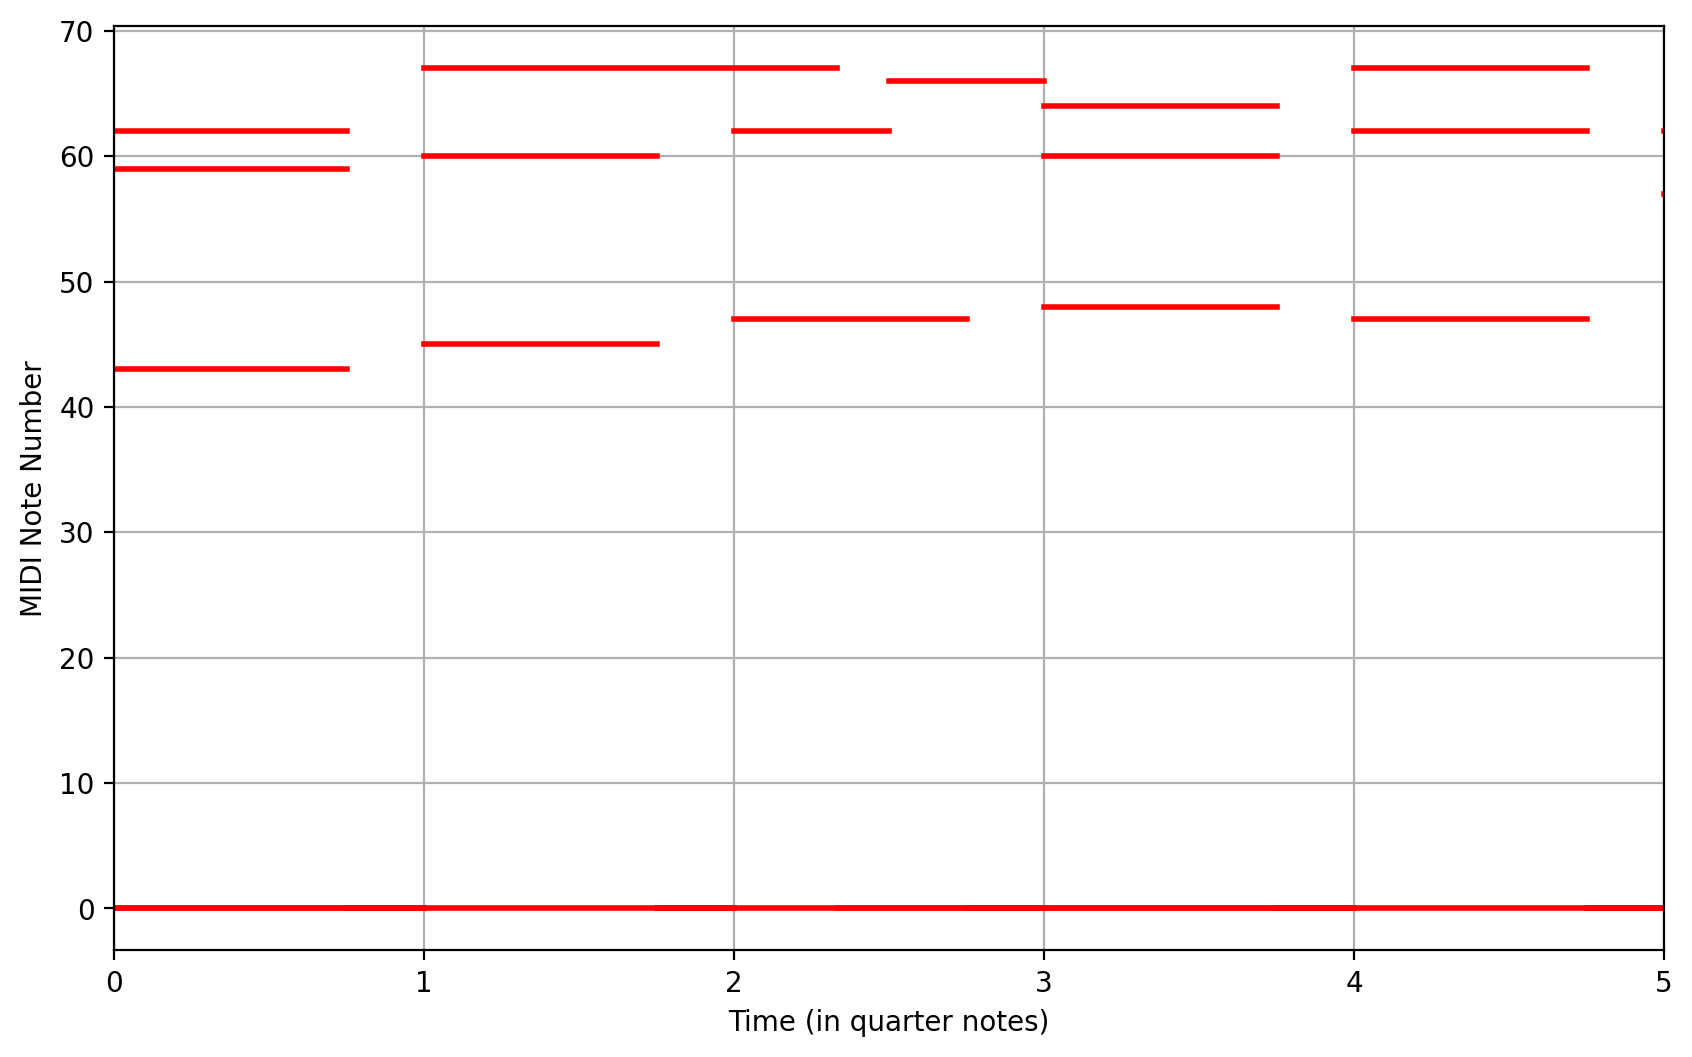

In [89]:
import music21
import matplotlib.pyplot as plt
import numpy as np

def show_graph(midi_path, color):
    # MIDI 파일을 불러오고 파싱합니다.
    midi_path = midi_path
    score = music21.converter.parse(midi_path)
    # 모든 노트를 추출합니다 (피아노 롤과 유사한 형식).
    notes_to_parse = [] # note 값 저장 공간
    for part in music21.instrument.partitionByInstrument(score).parts:
        # 각 파트에서 노트를 선택합니다.
        notes_to_parse.extend(part.recurse().notesAndRests)
    print(notes_to_parse[:30])
    # 각 노트에 대한 정보를 추출합니다: 시작 시간, 피치, 지속 시간.
    note_starts = []
    note_pitches = []
    note_durations = []
    
    
    for element in notes_to_parse:
        if isinstance(element, music21.note.Note): # 노트는 개별 소리를 나타냄
            note_starts.append(element.offset)
            note_pitches.append(element.pitch.midi)
            note_durations.append(element.duration.quarterLength)
        elif isinstance(element, music21.chord.Chord): # 코드인 경우 ( 3개 이상 화음을 말함)
            for note in element.pitches:
                note_starts.append(element.offset)
                note_pitches.append(note.midi)
                note_durations.append(element.duration.quarterLength)
        elif isinstance(element, music21.note.Rest):
            note_starts.append(element.offset)
            note_pitches.append(0)
            note_durations.append(element.duration.quarterLength)
    
    print(note_starts[:60])
    print(note_pitches[:30])
    print(note_durations[:30])
 
    plt.figure(figsize=(10, 6))
    plt.xlim([0, 5])
    
    for start, pitch, duration in zip(note_starts[:30], note_pitches[:30], note_durations[:30]):
        plt.plot([start, start + duration], [pitch, pitch], color=color, linewidth=2)
       # plt.plot([start, start + 0.5], [pitch+1, pitch+1], color='blue', linewidth=2)

    plt.xlabel('Time (in quarter notes)')
    plt.ylabel('MIDI Note Number')

    plt.grid(True)


show_graph('korea.mid', 'red')
plt.show()

- Chord 클래스 -> 여러가지 Note 클래스가 포함되어 있는 것 -> 화음이라고 함.
- Fraction 클래스 -> 